# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


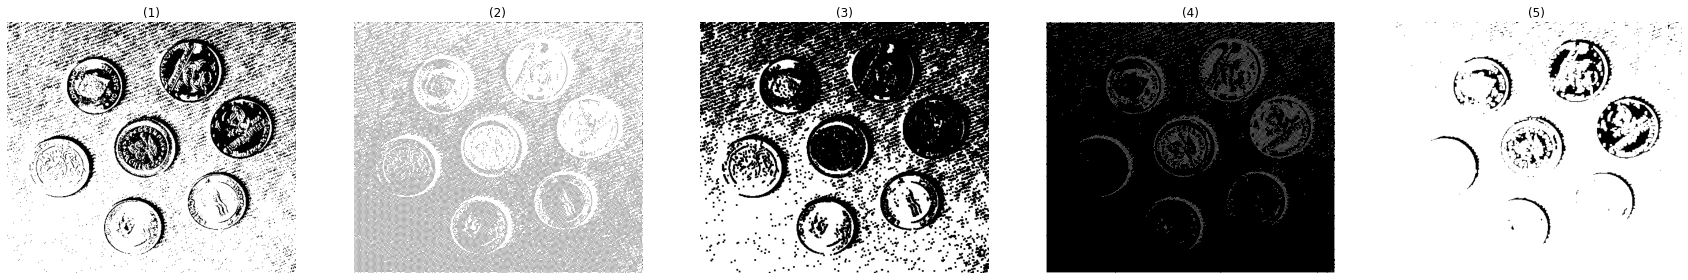

In [45]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

def erosion ( binImg , SE ):
    restultImg = binImg
    for i in range (1, restultImg.shape[0] - 1 ):
        for j in range (1, restultImg.shape[1] - 1 ):
            temp = restultImg[i-1:i+2 , j-1:j+2]
            if ( (temp == SE).all() ):
                restultImg[i][j]=0
            else:
                restultImg[i][j]=1
    return restultImg

def dilation ( binImg , SE ):
    restultImg2 = binImg
    for i in range (1, restultImg2.shape[0] - 1 ):
        for j in range (1, restultImg2.shape[1] - 1 ):
            temp = restultImg2[i-1:i+2 , j-1:j+2]
            if ( (temp == SE).any() ):
                restultImg2[i][j]=0
            else:
                restultImg2[i][j]=1
    return restultImg2


img = io.imread('coins.jpg')
grayImg = rgb2gray(img)*255
binImg = 1.0*(grayImg > 125)
SE = np.ones((3, 3))
print(binImg)
restultImg = erosion(np.copy(binImg) , SE)
restultImg2 = dilation(np.copy(binImg) , SE)


restultImg3 = binary_erosion(np.copy(binImg) , SE)
restultImg4 = binary_dilation(np.copy(binImg) , SE)


show_images([binImg,restultImg ,restultImg3,restultImg2 ,restultImg4 ])



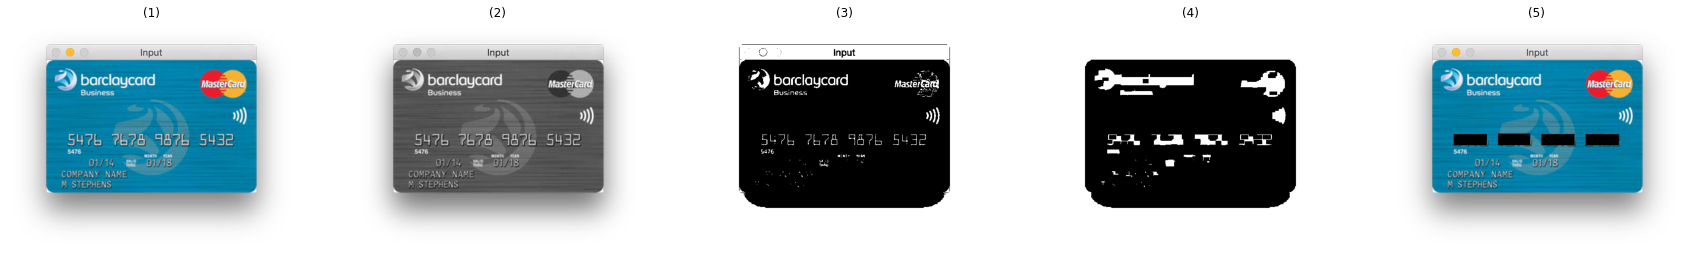

In [43]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
img55 = io.imread('card.jpg')
grayImg55 = rgb2gray(img55)*255
binImg55 = 1.0*(grayImg55 > 185)
img_with_boxes = np.copy(img55)
SE = np.ones((7, 12))

resultImg55 = binary_dilation(binImg55,SE)
resultImg55 = binary_erosion(resultImg55,SE)

#get all curve lines that have the same value ( each line is connected) 
contours = find_contours(resultImg55, 0.8)

bounding_boxes = []
for contour in contours:
    box = [np.min(contour[:, 1]), np.max(contour[:, 1]), np.min(contour[:, 0]), np.max(contour[:, 0])]
    aspectRatio = (box[1]-box[0])/float(box[3]-box[2])
    if aspectRatio > 2.5 and aspectRatio < 3.5:
        h = box[1]-box[0]
        if h > 40:
            bounding_boxes.append(box)
            

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=grayImg55.shape)
    rr = np.array(rr,dtype='int')
    cc = np.array(cc,dtype='int')
    img_with_boxes[rr, cc] = 1 #set color white
    
show_images([img55,grayImg55,binImg55,resultImg55,img_with_boxes])

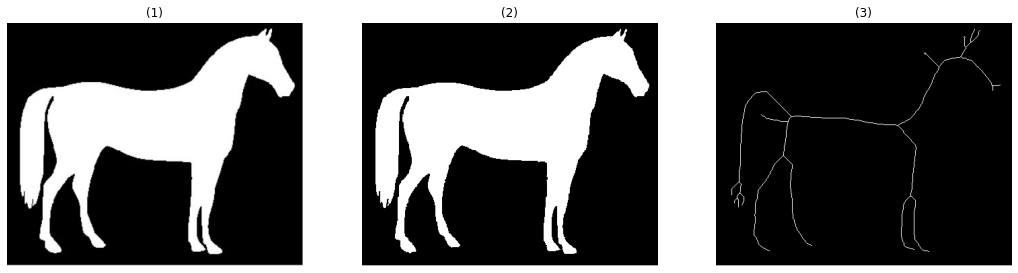

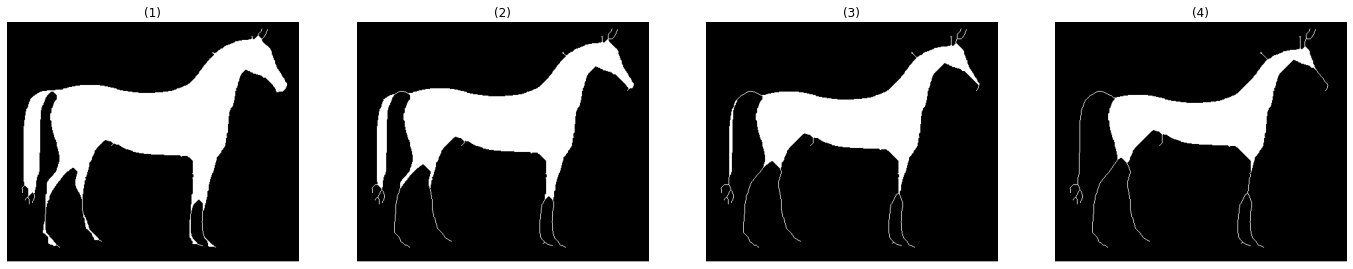

In [4]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = io.imread('horse.jpg')
grayImg = rgb2gray(img)
binImg = 1.0*(grayImg > 0.9)
SkeletonImg = skeletonize(binImg)
Thinned1 = thin(binImg, 5)
Thinned2 = thin(binImg, 10)
Thinned3 = thin(binImg, 15)
Thinned4 = thin(binImg, 20)
show_images([img, binImg, SkeletonImg])
show_images([Thinned1, Thinned2, Thinned3, Thinned4])